## Install Segment Anything Model (SAM) and other dependencies

In [1]:
import os
HOME = os.getcwd()
print("HOME:", HOME)

HOME: /home/jarvis


In [2]:
%cd {HOME}

# import sys
# !{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

/home/jarvis


In [3]:
# !pip install -q jupyter_bbox_widget roboflow dataclasses-json supervision
# !pip install torch
# !pip install torchvision

### Download SAM weights

In [4]:
%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

# !wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

/home/jarvis
mkdir: cannot create directory ‘/home/jarvis/weights’: File exists
/home/jarvis/weights


In [5]:
import os

CHECKPOINT_PATH = os.path.join(HOME, "weights", "sam_vit_h_4b8939.pth")
print(CHECKPOINT_PATH, "; exist:", os.path.isfile(CHECKPOINT_PATH))

/home/jarvis/weights/sam_vit_h_4b8939.pth ; exist: True


## Load Model

In [6]:
import torch

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"

In [7]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)

In [8]:
# Visdrone class labels
# names:
#   0: pedestrian
#   1: people
#   2: bicycle
#   3: car
#   4: van
#   5: truck
#   6: tricycle
#   7: awning-tricycle
#   8: bus
#   9: motor

In [32]:
with open("/home/jarvis/Desktop/EO_IR/visdrone/train/annotations/0000002_00005_d_0000014.txt") as f:
  content = f.readlines()
ped = 0
peo = 0
bic = 0
car = 0
van = 0
tru = 0
tri = 0
awn = 0
bus = 0
mot = 0

for i in range(len(content)):
  content[i] = content[i].replace("\n", "")
  if content[i][5]=="0":
    ped+=1
    # content[i][-1]="pedestrian"
  elif content[i][5]=="1":
    peo+=1
    # content[i][-1]="people"
  elif content[i][5]=="2":
    bic+=1
    # content[i][-1]="bicycle"
  elif content[i][5]=="3":
    car+=1
    # content[i][-1]="car"
  elif content[i][5]=="4":
    van+=1
    # content[i][-1]="van"
  elif content[i][5]=="5":
    tru+=1
    # content[i][-1]="truck"
  elif content[i][5]=="6":
    tri+=1
    # content[i][-1]="tricycle"
  elif content[i][5]=="7":
    awn+=1
    # content[i][-1]="awing tricycle"
  elif content[i][5]=="8":
    bus+=1
    # content[i][-1]="bus"
  elif content[i][5]=="9":
    mot+=1
    # content[i][-1]="motorcycle"

print(content)
print("Number of objects: ", len(content))
print("Number of Pedestrians: ", ped)
print("Number of People: ", peo)
print("Number of Bicycle: ", bic)
print("Number of Car: ", car)
print("Number of Van: ", van)
print("Number of Truck: ", tru)
print("Number of Tricycle: ", tri)
print("Number of Awning Tricycle: ", awn)
print("Number of Bus: ", bus)
print("Number of Motorcycle: ", mot)

new_list_ = []
new_list = []

['684,8,273,116,0,0,0,0', '406,119,265,70,0,0,0,0', '255,22,119,128,0,0,0,0', '1,3,209,78,0,0,0,0', '708,471,74,33,1,4,0,1', '639,425,61,46,1,4,0,0', '594,399,64,51,1,4,0,0', '562,390,61,38,1,4,0,0', '540,372,65,33,1,4,0,1', '514,333,68,35,1,4,0,0', '501,317,64,31,1,4,0,1', '501,299,45,28,1,4,0,1', '489,284,48,27,1,4,0,1', '463,262,48,29,1,4,0,0', '458,252,49,22,1,4,0,1', '448,242,45,20,1,4,0,1', '442,230,49,19,1,4,0,1', '439,214,45,21,1,4,0,1', '429,208,42,19,1,4,0,1', '420,199,43,20,1,4,0,1', '398,188,41,18,1,4,0,1', '46,391,14,26,1,2,0,0', '421,433,74,44,1,4,0,1', '369,346,64,34,1,4,0,0', '398,410,72,46,1,4,0,1', '394,393,70,36,1,4,0,1', '377,364,71,38,1,4,0,0', '357,312,58,31,1,4,0,0', '359,298,54,22,1,4,0,2', '348,283,43,28,1,5,0,1', '345,271,52,19,1,4,0,1', '340,260,60,18,1,5,0,1', '340,250,52,16,1,4,0,1', '332,231,54,22,1,5,0,1', '323,213,45,25,1,5,0,0', '317,195,45,31,1,6,0,1', '316,188,36,15,1,4,0,2', '308,179,44,17,1,4,0,1', '345,163,37,18,1,4,0,0', '384,164,26,22,1,4,0,1', '

In [33]:
new_list_ = []
new_list = []
print(content)

['684,8,273,116,0,0,0,0', '406,119,265,70,0,0,0,0', '255,22,119,128,0,0,0,0', '1,3,209,78,0,0,0,0', '708,471,74,33,1,4,0,1', '639,425,61,46,1,4,0,0', '594,399,64,51,1,4,0,0', '562,390,61,38,1,4,0,0', '540,372,65,33,1,4,0,1', '514,333,68,35,1,4,0,0', '501,317,64,31,1,4,0,1', '501,299,45,28,1,4,0,1', '489,284,48,27,1,4,0,1', '463,262,48,29,1,4,0,0', '458,252,49,22,1,4,0,1', '448,242,45,20,1,4,0,1', '442,230,49,19,1,4,0,1', '439,214,45,21,1,4,0,1', '429,208,42,19,1,4,0,1', '420,199,43,20,1,4,0,1', '398,188,41,18,1,4,0,1', '46,391,14,26,1,2,0,0', '421,433,74,44,1,4,0,1', '369,346,64,34,1,4,0,0', '398,410,72,46,1,4,0,1', '394,393,70,36,1,4,0,1', '377,364,71,38,1,4,0,0', '357,312,58,31,1,4,0,0', '359,298,54,22,1,4,0,2', '348,283,43,28,1,5,0,1', '345,271,52,19,1,4,0,1', '340,260,60,18,1,5,0,1', '340,250,52,16,1,4,0,1', '332,231,54,22,1,5,0,1', '323,213,45,25,1,5,0,0', '317,195,45,31,1,6,0,1', '316,188,36,15,1,4,0,2', '308,179,44,17,1,4,0,1', '345,163,37,18,1,4,0,0', '384,164,26,22,1,4,0,1', '

In [34]:
for i in range(len(content)):
  new_list_.append(content[i].split(','))
    # new_list += content[i]
print(new_list_)
print(len(new_list_))

[['684', '8', '273', '116', '0', '0', '0', '0'], ['406', '119', '265', '70', '0', '0', '0', '0'], ['255', '22', '119', '128', '0', '0', '0', '0'], ['1', '3', '209', '78', '0', '0', '0', '0'], ['708', '471', '74', '33', '1', '4', '0', '1'], ['639', '425', '61', '46', '1', '4', '0', '0'], ['594', '399', '64', '51', '1', '4', '0', '0'], ['562', '390', '61', '38', '1', '4', '0', '0'], ['540', '372', '65', '33', '1', '4', '0', '1'], ['514', '333', '68', '35', '1', '4', '0', '0'], ['501', '317', '64', '31', '1', '4', '0', '1'], ['501', '299', '45', '28', '1', '4', '0', '1'], ['489', '284', '48', '27', '1', '4', '0', '1'], ['463', '262', '48', '29', '1', '4', '0', '0'], ['458', '252', '49', '22', '1', '4', '0', '1'], ['448', '242', '45', '20', '1', '4', '0', '1'], ['442', '230', '49', '19', '1', '4', '0', '1'], ['439', '214', '45', '21', '1', '4', '0', '1'], ['429', '208', '42', '19', '1', '4', '0', '1'], ['420', '199', '43', '20', '1', '4', '0', '1'], ['398', '188', '41', '18', '1', '4', '0'

In [35]:
print(new_list)
print(len(new_list))

[]
0


In [36]:
ped = 0
peo = 0
bic = 0
car = 0
van = 0
tru = 0
tri = 0
awn = 0
bus = 0
mot = 0
oth = 0

for i in range(0,len(new_list_)):
  if int(new_list_[i][5])==1:
    # new_list_[i].append("pedestrain")
    new_list.append(new_list_[i][:4]+["pedestrain"])
    ped+=1
  elif int(new_list_[i][5])==2:
    new_list.append(new_list_[i][:4]+["people"])
    peo+=1
  elif int(new_list_[i][5])==3:
    new_list.append(new_list_[i][:4]+["bicycle"])
    bic+=1
  elif int(new_list_[i][5])==4:
    new_list.append(new_list_[i][:4]+["car"])
    car+=1
  elif int(new_list_[i][5])==5:
    new_list.append(new_list_[i][:4]+["van"])
    van+=1
  elif int(new_list_[i][5])==6:
    new_list.append(new_list_[i][:4]+["truck"])
    tru+=1
  elif int(new_list_[i][5])==7:
    new_list.append(new_list_[i][:4]+["tricycle"])
    tri+=1
  elif int(new_list_[i][5])==8:
    new_list.append(new_list_[i][:4]+["awing-tricycle"])
    awn+=1
  elif int(new_list_[i][5])==9:
    new_list.append(new_list_[i][:4]+["bus"])
    bus+=1
  elif int(new_list_[i][5])==10:
    new_list.append(new_list_[i][:4]+["motor"])
    mot+=1
  elif int(new_list_[i][5])==11:
    # new_list_[i].append("pedestrain")
    new_list.append(new_list_[i][:4]+["others"])
    oth+=1
  else:
    print("ERROR at ", i, new_list_[i])

print(new_list)

print("Number of objects: ", len(content))
print("Number of Pedestrians: ", ped)
print("Number of People: ", peo)
print("Number of Bicycle: ", bic)
print("Number of Car: ", car)
print("Number of Van: ", van)
print("Number of Truck: ", tru)
print("Number of Tricycle: ", tri)
print("Number of Awning Tricycle: ", awn)
print("Number of Bus: ", bus)
print("Number of Motorcycle: ", mot)

ERROR at  0 ['684', '8', '273', '116', '0', '0', '0', '0']
ERROR at  1 ['406', '119', '265', '70', '0', '0', '0', '0']
ERROR at  2 ['255', '22', '119', '128', '0', '0', '0', '0']
ERROR at  3 ['1', '3', '209', '78', '0', '0', '0', '0']
ERROR at  85 ['912', '139', '34', '73', '0', '0', '0', '0']
[['708', '471', '74', '33', 'car'], ['639', '425', '61', '46', 'car'], ['594', '399', '64', '51', 'car'], ['562', '390', '61', '38', 'car'], ['540', '372', '65', '33', 'car'], ['514', '333', '68', '35', 'car'], ['501', '317', '64', '31', 'car'], ['501', '299', '45', '28', 'car'], ['489', '284', '48', '27', 'car'], ['463', '262', '48', '29', 'car'], ['458', '252', '49', '22', 'car'], ['448', '242', '45', '20', 'car'], ['442', '230', '49', '19', 'car'], ['439', '214', '45', '21', 'car'], ['429', '208', '42', '19', 'car'], ['420', '199', '43', '20', 'car'], ['398', '188', '41', '18', 'car'], ['46', '391', '14', '26', 'people'], ['421', '433', '74', '44', 'car'], ['369', '346', '64', '34', 'car'], ['

In [37]:
# !pip install shapely



# import numpy as np
# car_bbox = []

# for i in range(0,len(new_list_)):
#   if int(new_list_[i][5])==2:
#     np.array(car_bbox.append(np.array([new_list[i][0], new_list[i][1], new_list[i][2], new_list[i][3]])))

# # print(car_bbox)

# print(car_det[0].xyxy[0][0])

In [38]:
print(len(new_list))
print(len(new_list_))

83
88


In [39]:
# for i in range(0,(len(new_list))):
#   if int(new_list_[i][5])==4:
#     print(new_list[i], "\t", new_list_[i])
#     np.array(car_bbox.append(np.array([new_list[i][0], new_list[i][1], new_list[i][2], new_list[i][3]])))
#     print(car_bbox[0][0])

In [40]:
# For Pedestrains class only
import numpy as np
import cv2
import numpy as np
import numpy
import supervision as sv
import os
import json
from shapely.geometry import Polygon

ped_bbox = []
ppl_bbox = []
bic_bbox = []
car_bbox = []
van_bbox = []
tru_bbox = []
tri_bbox = []
awi_bbox = []
bus_bbox = []
mot_bbox = []

# for i in range(0,len(new_list_)):
#   # if int(new_list_[i][5])==0 or int(new_list_[i][5])==1 or int(new_list_[i][5])==2 or int(new_list_[i][5])==3 or int(new_list_[i][5])==4 or int(new_list_[i][5])==5 or int(new_list_[i][5])==6 or int(new_list_[i][5])==7 or int(new_list_[i][5])==8 or int(new_list_[i][5])==9 or int(new_list_[i][5])==10 or int(new_list_[i][5])==11:
#   if int(new_list_[i][5])==0:
#       # print(new_list[i][2], "HEY*********")
#       np.array(car_bbox.append(np.array([new_list[i][0], new_list[i][1], new_list[i][2], new_list[i][3]])))

print(len(new_list_), "length...")

for i in range(0,(len(new_list))):
  if int(new_list_[i][5])==1:
    np.array(ped_bbox.append(np.array([new_list_[i][0], new_list_[i][1], new_list_[i][2], new_list_[i][3]])))
  elif int(new_list_[i][5])==2:
    np.array(ppl_bbox.append(np.array([new_list_[i][0], new_list_[i][1], new_list_[i][2], new_list_[i][3]])))
  elif int(new_list_[i][5])==3:
    np.array(bic_bbox.append(np.array([new_list_[i][0], new_list_[i][1], new_list_[i][2], new_list_[i][3]])))
  elif int(new_list_[i][5])==4:
    np.array(car_bbox.append(np.array([new_list_[i][0], new_list_[i][1], new_list_[i][2], new_list_[i][3]])))
  elif int(new_list_[i][5])==5:
    np.array(van_bbox.append(np.array([new_list_[i][0], new_list_[i][1], new_list_[i][2], new_list_[i][3]])))
  elif int(new_list_[i][5])==6:
    np.array(tru_bbox.append(np.array([new_list_[i][0], new_list_[i][1], new_list_[i][2], new_list_[i][3]])))
  elif int(new_list_[i][5])==7:
    np.array(tri_bbox.append(np.array([new_list_[i][0], new_list_[i][1], new_list_[i][2], new_list_[i][3]])))
  elif int(new_list_[i][5])==8:
    np.array(awi_bbox.append(np.array([new_list_[i][0], new_list_[i][1], new_list_[i][2], new_list_[i][3]])))
  elif int(new_list_[i][5])==9:
    np.array(bus_bbox.append(np.array([new_list_[i][0], new_list_[i][1], new_list_[i][2], new_list_[i][3]])))
  elif int(new_list_[i][5])==10:
    np.array(mot_bbox.append(np.array([new_list_[i][0], new_list_[i][1], new_list_[i][2], new_list_[i][3]])))
  else:
    continue
# Converting the annotation of Visdrone format to bounding box coordinates

ped_np_bbox = []
ppl_np_bbox = []
bic_np_bbox = []
car_np_bbox = []
van_np_bbox = []
tru_np_bbox = []
tri_np_bbox = []
awi_np_bbox = []
bus_np_bbox = []
mot_np_bbox = []


# Convert list to numpy
for i in ped_bbox:
  ped_y = i
  ped_box = np.array([int(ped_y[0]),int(ped_y[1]),int(ped_y[0])+int(ped_y[2]),int(ped_y[1])+int(ped_y[3])])
  ped_np_bbox.append(ped_box)


for i in ppl_bbox:
  ppl_y = i
  ppl_box = np.array([int(ppl_y[0]),int(ppl_y[1]),int(ppl_y[0])+int(ppl_y[2]),int(ppl_y[1])+int(ppl_y[3])])
  ppl_np_bbox.append(ppl_box)


for i in bic_bbox:
  bic_y = i
  bic_box = np.array([int(bic_y[0]),int(bic_y[1]),int(bic_y[0])+int(bic_y[2]),int(bic_y[1])+int(bic_y[3])])
  bic_np_bbox.append(bic_box)


for i in car_bbox:
  # y = i.astype(numpy.float)
  y = i
  box = np.array([int(y[0]),int(y[1]),int(y[0])+int(y[2]),int(y[1])+int(y[3])])
  car_np_bbox.append(box)


for i in van_bbox:
  van_y = i
  van_box = np.array([int(van_y[0]),int(van_y[1]),int(van_y[0])+int(van_y[2]),int(van_y[1])+int(van_y[3])])
  van_np_bbox.append(van_box)


for i in tru_bbox:
  tru_y = i
  tru_box = np.array([int(tru_y[0]),int(tru_y[1]),int(tru_y[0])+int(tru_y[2]),int(tru_y[1])+int(tru_y[3])])
  tru_np_bbox.append(tru_box)


for i in tri_bbox:
  tri_y = i
  tri_box = np.array([int(tri_y[0]),int(tri_y[1]),int(tri_y[0])+int(tri_y[2]),int(tri_y[1])+int(tri_y[3])])
  tri_np_bbox.append(tri_box)



for i in awi_bbox:
  awi_y = i
  awi_box = np.array([int(awi_y[0]),int(awi_y[1]),int(awi_y[0])+int(awi_y[2]),int(awi_y[1])+int(awi_y[3])])
  awi_np_bbox.append(awi_box)


for i in bus_bbox:
  bus_y = i
  bus_box = np.array([int(bus_y[0]),int(bus_y[1]),int(bus_y[0])+int(bus_y[2]),int(bus_y[1])+int(bus_y[3])])
  bus_np_bbox.append(bus_box)


for i in mot_bbox:
  mot_y = i
  mot_box = np.array([int(mot_y[0]),int(mot_y[1]),int(mot_y[0])+int(mot_y[2]),int(mot_y[1])+int(mot_y[3])])
  mot_np_bbox.append(mot_box)

# print(car_np_bbox)
# abc = numpy.array(['685', '463', '795', '528'])
# print(len(car_np_bbox))

# For generating the mask files for the given bounding box using SAM

IMAGE_PATH = "/home/jarvis/Desktop/EO_IR/visdrone/train/images/0000002_00005_d_0000014.jpg"
mask_predictor = SamPredictor(sam)

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

mask_predictor.set_image(image_rgb)

ped_masks = []
ppl_masks = []
bic_masks = []
car_masks = []
van_masks = []
tru_masks = []
tri_masks = []
awi_masks = []
bus_masks = []
mot_masks = []


for i in ped_np_bbox:
  ped_masks_, scores, logits = mask_predictor.predict(
    # box=numpy.array(i),
    box = i, multimask_output=True)
  ped_masks.append(ped_masks_)


for i in ppl_np_bbox:
  ppl_masks_, scores, logits = mask_predictor.predict(
    # box=numpy.array(i),
    box = i, multimask_output=True)
  ppl_masks.append(ppl_masks_)


for i in bic_np_bbox:
  bic_masks_, scores, logits = mask_predictor.predict(
    # box=numpy.array(i),
    box = i, multimask_output=True)
  bic_masks.append(bic_masks_)


for i in car_np_bbox:
  masks, scores, logits = mask_predictor.predict(
    # box=numpy.array(i),
    box = i, multimask_output=True)
  car_masks.append(masks)



for i in van_np_bbox:
  van_masks_, scores, logits = mask_predictor.predict(
    # box=numpy.array(i),
    box = i, multimask_output=True)
  van_masks.append(van_masks_)


for i in tru_np_bbox:
  tru_masks_, scores, logits = mask_predictor.predict(
    # box=numpy.array(i),
    box = i, multimask_output=True)
  tru_masks.append(tru_masks_)
    

for i in tri_np_bbox:
  tri_masks_, scores, logits = mask_predictor.predict(
    # box=numpy.array(i),
    box = i, multimask_output=True)
  tri_masks.append(tri_masks_)


for i in awi_np_bbox:
  awi_masks_, scores, logits = mask_predictor.predict(
    # box=numpy.array(i),
    box = i, multimask_output=True)
  awi_masks.append(awi_masks_)



for i in bus_np_bbox:
  bus_masks_, scores, logits = mask_predictor.predict(
    # box=numpy.array(i),
    box = i, multimask_output=True)
  bus_masks.append(bus_masks_)


for i in mot_np_bbox:
  mot_masks_, scores, logits = mask_predictor.predict(
    # box=numpy.array(i),
    box = i, multimask_output=True)
  mot_masks.append(mot_masks_)


print(len(ped_masks))
print(len(ppl_masks))
print(len(bic_masks))
print(len(car_masks))
print(len(van_masks))
print(len(tru_masks))
print(len(tri_masks))
print(len(awi_masks))
print(len(bus_masks))
print(len(mot_masks))
# print(HEY)



88 length...
11
9
3
39
6
1
1
2
0
6


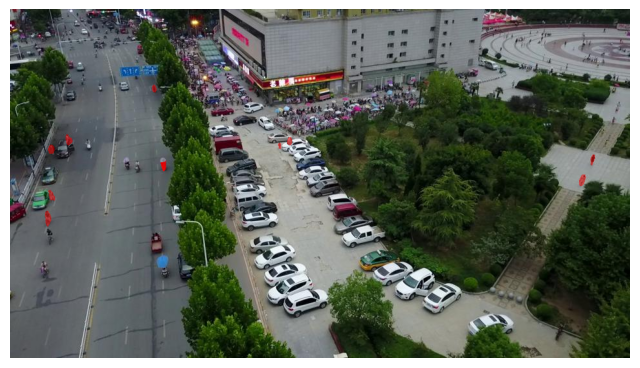

[[(417.0, 207.0), (416.0, 208.0), (415.0, 208.0), (415.0, 211.0), (416.0, 212.0), (416.0, 215.0), (417.0, 215.0), (418.0, 216.0), (419.0, 215.0), (419.0, 208.0), (418.0, 207.0), (417.0, 207.0)], [(432.0, 198.0), (430.0, 200.0), (430.0, 202.0), (429.0, 203.0), (429.0, 208.0), (430.0, 209.0), (431.0, 209.0), (432.0, 210.0), (434.0, 210.0), (435.0, 209.0), (435.0, 208.0), (436.0, 207.0), (436.0, 201.0), (435.0, 200.0), (435.0, 199.0), (434.0, 198.0), (432.0, 198.0)], [(886.0, 256.0), (884.0, 258.0), (884.0, 259.0), (883.0, 260.0), (883.0, 261.0), (882.0, 262.0), (882.0, 263.0), (881.0, 264.0), (881.0, 271.0), (882.0, 272.0), (882.0, 273.0), (885.0, 273.0), (888.0, 270.0), (888.0, 268.0), (889.0, 267.0), (889.0, 265.0), (890.0, 264.0), (890.0, 262.0), (891.0, 261.0), (891.0, 259.0), (890.0, 258.0), (890.0, 256.0), (886.0, 256.0)], [(902.0, 225.0), (901.0, 226.0), (901.0, 227.0), (900.0, 228.0), (900.0, 229.0), (899.0, 230.0), (899.0, 240.0), (900.0, 241.0), (901.0, 241.0), (901.0, 240.0), 

In [45]:
# To plot the masks on the image for verification
ped_det = []
box_annotator = sv.BoxAnnotator(color=sv.Color.red())
mask_annotator = sv.MaskAnnotator(color=sv.Color.red())

for j in ped_masks:
  ped_detections = sv.Detections(
    xyxy=sv.mask_to_xyxy(masks=j),
    mask=j
  )
  ped_detections = ped_detections[ped_detections.area == np.max(ped_detections.area)]
  ped_det.append(ped_detections)

  source_image = box_annotator.annotate(scene=image_bgr.copy(), detections=ped_detections, skip_label=True)
  segmented_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=ped_detections)

# TO plot all the bounding box in single input image:
image = cv2.imread('/home/jarvis/Desktop/EO_IR/visdrone/train/images/0000002_00005_d_0000014.jpg')
for j in ped_det:
  if j[0].xyxy[0][0]==ped_det[0].xyxy[0][0]:
    annotated_image = mask_annotator.annotate(image, detections=j)
  else:
    annotated_image = mask_annotator.annotate(annotated_image.copy(), detections=j)
sv.plot_image(image=annotated_image, size=(8, 8))


# TO get polygons of respective bounding boxes in a given single image:
ped_lst = []

def create_coco_annotation(binary_masks, image_ids, category_id):
    annotations = []
    binary_masks = np.array(binary_masks, np.uint8)
    for i, mask_data in enumerate(binary_masks):
        # Find contours from binary mask
        contours, _ = cv2.findContours(mask_data.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Convert contours to polygon
        polygons = []
        for contour in contours:
            contour = contour.squeeze()
            polygon = Polygon(contour)
            polygons.append(np.array(polygon.exterior.coords).ravel().tolist())
            ped_lst.append(polygons)

    return ped_lst

# print(ped_det, "PED_DET")
# print(ped_det[1].mask+0, "PED_DET")
binary_masks = ped_det[0].mask+0
image_ids = "abc"
category_id = 1  # Category ID for the objects in the masks

for det_id in range(len(ped_det)):
  ped_pg_pnt = create_coco_annotation(ped_det[det_id].mask+0, image_ids, category_id)
    
# print(pg_pnt)
new_ped_lst = []
count = 0
for i in ped_pg_pnt:
  count += 1
  tmp_lst = []
  for j in i:
    for n in range(len(j)):
      if n%2==0:
        tmp_lst.append((j[n], j[n+1]))
  new_ped_lst.append(tmp_lst)
print(new_ped_lst)

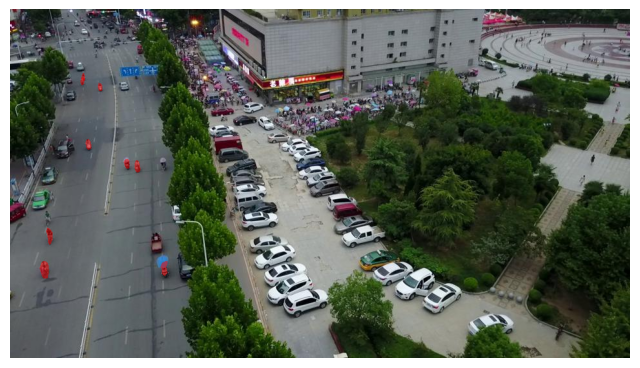

[[(51.0, 390.0), (50.0, 391.0), (49.0, 391.0), (49.0, 392.0), (48.0, 393.0), (48.0, 395.0), (47.0, 396.0), (47.0, 398.0), (46.0, 399.0), (46.0, 402.0), (47.0, 403.0), (47.0, 406.0), (48.0, 407.0), (48.0, 409.0), (49.0, 410.0), (49.0, 412.0), (50.0, 413.0), (50.0, 414.0), (52.0, 416.0), (57.0, 416.0), (58.0, 415.0), (58.0, 411.0), (59.0, 410.0), (59.0, 404.0), (60.0, 403.0), (59.0, 402.0), (59.0, 396.0), (58.0, 395.0), (58.0, 393.0), (56.0, 391.0), (55.0, 391.0), (54.0, 390.0), (51.0, 390.0)], [(240.0, 390.0), (239.0, 391.0), (238.0, 391.0), (237.0, 392.0), (236.0, 392.0), (235.0, 393.0), (235.0, 394.0), (234.0, 395.0), (234.0, 397.0), (233.0, 398.0), (233.0, 399.0), (235.0, 401.0), (235.0, 409.0), (238.0, 412.0), (239.0, 412.0), (240.0, 411.0), (241.0, 411.0), (241.0, 410.0), (243.0, 408.0), (243.0, 406.0), (242.0, 405.0), (242.0, 401.0), (241.0, 400.0), (241.0, 398.0), (242.0, 397.0), (242.0, 395.0), (243.0, 394.0), (243.0, 390.0), (240.0, 390.0)], [(58.0, 338.0), (57.0, 339.0), (57.0

In [47]:
# To plot the masks on the image for verification
ppl_det = []
box_annotator = sv.BoxAnnotator(color=sv.Color.red())
mask_annotator = sv.MaskAnnotator(color=sv.Color.red())

for j in ppl_masks:
  ppl_detections = sv.Detections(
    xyxy=sv.mask_to_xyxy(masks=j),
    mask=j
  )
  ppl_detections = ppl_detections[ppl_detections.area == np.max(ppl_detections.area)]
  ppl_det.append(ppl_detections)

  source_image = box_annotator.annotate(scene=image_bgr.copy(), detections=ppl_detections, skip_label=True)
  segmented_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=ppl_detections)

# TO plot all the bounding box in single input image:
image = cv2.imread('/home/jarvis/Desktop/EO_IR/visdrone/train/images/0000002_00005_d_0000014.jpg')
for j in ppl_det:
  if j[0].xyxy[0][0]==ppl_det[0].xyxy[0][0]:
    annotated_image = mask_annotator.annotate(image, detections=j)
  else:
    annotated_image = mask_annotator.annotate(annotated_image.copy(), detections=j)
sv.plot_image(image=annotated_image, size=(8, 8))


# TO get polygons of respective bounding boxes in a given single image:
ppl_lst = []

def create_coco_annotation(binary_masks, image_ids, category_id):
    annotations = []
    binary_masks = np.array(binary_masks, np.uint8)
    for i, mask_data in enumerate(binary_masks):
        # Find contours from binary mask
        contours, _ = cv2.findContours(mask_data.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Convert contours to polygon
        polygons = []
        for contour in contours:
            contour = contour.squeeze()
            polygon = Polygon(contour)
            polygons.append(np.array(polygon.exterior.coords).ravel().tolist())
            ppl_lst.append(polygons)

    return ppl_lst

# print(ped_det, "PED_DET")
# print(ped_det[1].mask+0, "PED_DET")
binary_masks = ppl_det[0].mask+0
image_ids = "abc"
category_id = 2  # Category ID for the objects in the masks

for det_id in range(len(ppl_det)):
  ppl_pg_pnt = create_coco_annotation(ppl_det[det_id].mask+0, image_ids, category_id)
    
# print(pg_pnt)
new_ppl_lst = []
count = 0
for i in ppl_pg_pnt:
  count += 1
  tmp_lst = []
  for j in i:
    for n in range(len(j)):
      if n%2==0:
        tmp_lst.append((j[n], j[n+1]))
  new_ppl_lst.append(tmp_lst)
print(new_ppl_lst)

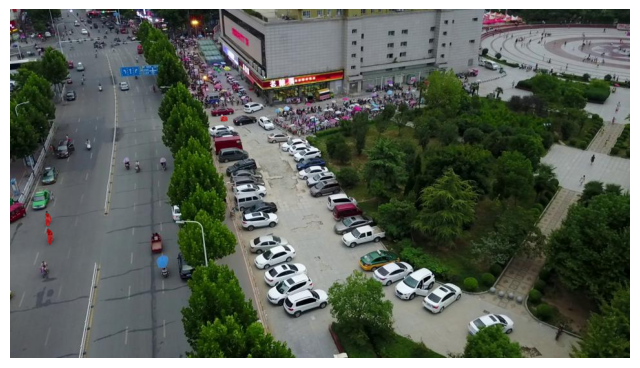

[[(327.0, 166.0), (326.0, 167.0), (326.0, 172.0), (327.0, 173.0), (334.0, 173.0), (335.0, 172.0), (336.0, 172.0), (336.0, 168.0), (334.0, 166.0), (327.0, 166.0)], [(58.0, 340.0), (58.0, 341.0), (57.0, 342.0), (57.0, 345.0), (56.0, 346.0), (57.0, 347.0), (57.0, 348.0), (58.0, 349.0), (58.0, 355.0), (59.0, 356.0), (59.0, 361.0), (60.0, 362.0), (60.0, 363.0), (61.0, 364.0), (62.0, 364.0), (62.0, 363.0), (63.0, 362.0), (63.0, 361.0), (64.0, 360.0), (64.0, 359.0), (65.0, 358.0), (65.0, 345.0), (61.0, 341.0), (60.0, 341.0), (59.0, 340.0), (58.0, 340.0)], [(56.0, 316.0), (55.0, 317.0), (55.0, 332.0), (56.0, 333.0), (56.0, 334.0), (57.0, 335.0), (59.0, 335.0), (60.0, 334.0), (60.0, 333.0), (61.0, 332.0), (61.0, 331.0), (62.0, 330.0), (62.0, 328.0), (63.0, 327.0), (63.0, 323.0), (62.0, 322.0), (62.0, 320.0), (61.0, 319.0), (61.0, 318.0), (60.0, 317.0), (59.0, 317.0), (58.0, 316.0), (56.0, 316.0)]]


In [49]:
# To plot the masks on the image for verification
bic_det = []
box_annotator = sv.BoxAnnotator(color=sv.Color.red())
mask_annotator = sv.MaskAnnotator(color=sv.Color.red())

for j in bic_masks:
  bic_detections = sv.Detections(
    xyxy=sv.mask_to_xyxy(masks=j),
    mask=j
  )
  bic_detections = bic_detections[bic_detections.area == np.max(bic_detections.area)]
  bic_det.append(bic_detections)

  source_image = box_annotator.annotate(scene=image_bgr.copy(), detections=bic_detections, skip_label=True)
  segmented_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=bic_detections)

# TO plot all the bounding box in single input image:
image = cv2.imread('/home/jarvis/Desktop/EO_IR/visdrone/train/images/0000002_00005_d_0000014.jpg')
for j in bic_det:
  if j[0].xyxy[0][0]==bic_det[0].xyxy[0][0]:
    annotated_image = mask_annotator.annotate(image, detections=j)
  else:
    annotated_image = mask_annotator.annotate(annotated_image.copy(), detections=j)
sv.plot_image(image=annotated_image, size=(8, 8))


# TO get polygons of respective bounding boxes in a given single image:
bic_lst = []

def create_coco_annotation(binary_masks, image_ids, category_id):
    annotations = []
    binary_masks = np.array(binary_masks, np.uint8)
    for i, mask_data in enumerate(binary_masks):
        # Find contours from binary mask
        contours, _ = cv2.findContours(mask_data.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Convert contours to polygon
        polygons = []
        for contour in contours:
            contour = contour.squeeze()
            polygon = Polygon(contour)
            polygons.append(np.array(polygon.exterior.coords).ravel().tolist())
            bic_lst.append(polygons)

    return bic_lst

# print(ped_det, "PED_DET")
# print(ped_det[1].mask+0, "PED_DET")
binary_masks = bic_det[0].mask+0
image_ids = "abc"
category_id = 3  # Category ID for the objects in the masks

for det_id in range(len(bic_det)):
  bic_pg_pnt = create_coco_annotation(bic_det[det_id].mask+0, image_ids, category_id)
    
# print(pg_pnt)
new_bic_lst = []
count = 0
for i in bic_pg_pnt:
  count += 1
  tmp_lst = []
  for j in i:
    for n in range(len(j)):
      if n%2==0:
        tmp_lst.append((j[n], j[n+1]))
  new_bic_lst.append(tmp_lst)
print(new_bic_lst)

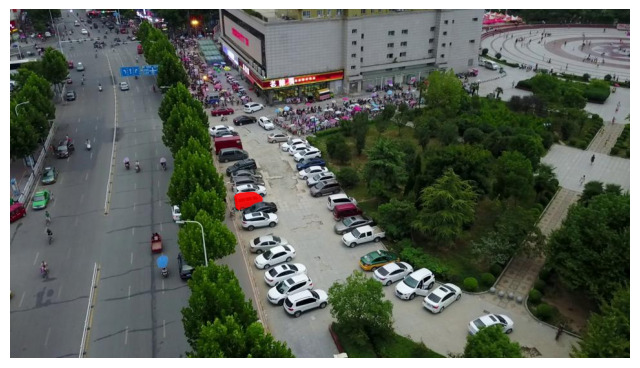

[[(363.0, 283.0), (362.0, 284.0), (355.0, 284.0), (354.0, 285.0), (353.0, 285.0), (352.0, 286.0), (350.0, 286.0), (347.0, 289.0), (347.0, 291.0), (348.0, 292.0), (348.0, 298.0), (349.0, 299.0), (349.0, 304.0), (350.0, 305.0), (350.0, 306.0), (353.0, 309.0), (353.0, 310.0), (354.0, 310.0), (355.0, 309.0), (355.0, 308.0), (356.0, 307.0), (356.0, 306.0), (358.0, 304.0), (361.0, 304.0), (362.0, 303.0), (364.0, 303.0), (365.0, 302.0), (366.0, 303.0), (370.0, 303.0), (371.0, 302.0), (373.0, 302.0), (377.0, 298.0), (380.0, 298.0), (381.0, 297.0), (384.0, 297.0), (385.0, 296.0), (388.0, 296.0), (389.0, 295.0), (389.0, 291.0), (384.0, 286.0), (383.0, 286.0), (381.0, 284.0), (379.0, 284.0), (378.0, 283.0), (363.0, 283.0)], [(366.0, 283.0), (365.0, 284.0), (357.0, 284.0), (356.0, 285.0), (354.0, 285.0), (353.0, 286.0), (351.0, 286.0), (350.0, 287.0), (349.0, 287.0), (348.0, 288.0), (348.0, 289.0), (347.0, 290.0), (348.0, 291.0), (348.0, 297.0), (349.0, 298.0), (349.0, 304.0), (350.0, 305.0), (350

In [51]:
# To plot the masks on the image for verification
van_det = []
box_annotator = sv.BoxAnnotator(color=sv.Color.red())
mask_annotator = sv.MaskAnnotator(color=sv.Color.red())

for j in van_masks:
  van_detections = sv.Detections(
    xyxy=sv.mask_to_xyxy(masks=j),
    mask=j
  )
  van_detections = van_detections[van_detections.area == np.max(van_detections.area)]
  van_det.append(bic_detections)

  source_image = box_annotator.annotate(scene=image_bgr.copy(), detections=van_detections, skip_label=True)
  segmented_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=van_detections)

# TO plot all the bounding box in single input image:
image = cv2.imread('/home/jarvis/Desktop/EO_IR/visdrone/train/images/0000002_00005_d_0000014.jpg')
for j in van_det:
  if j[0].xyxy[0][0]==van_det[0].xyxy[0][0]:
    annotated_image = mask_annotator.annotate(image, detections=j)
  else:
    annotated_image = mask_annotator.annotate(annotated_image.copy(), detections=j)
sv.plot_image(image=annotated_image, size=(8, 8))


# TO get polygons of respective bounding boxes in a given single image:
van_lst = []

def create_coco_annotation(binary_masks, image_ids, category_id):
    annotations = []
    binary_masks = np.array(binary_masks, np.uint8)
    for i, mask_data in enumerate(binary_masks):
        # Find contours from binary mask
        contours, _ = cv2.findContours(mask_data.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Convert contours to polygon
        polygons = []
        for contour in contours:
            contour = contour.squeeze()
            polygon = Polygon(contour)
            polygons.append(np.array(polygon.exterior.coords).ravel().tolist())
            van_lst.append(polygons)

    return van_lst

# print(ped_det, "PED_DET")
# print(ped_det[1].mask+0, "PED_DET")
binary_masks = van_det[0].mask+0
image_ids = "abc"
category_id = 5  # Category ID for the objects in the masks

for det_id in range(len(van_det)):
  van_pg_pnt = create_coco_annotation(van_det[det_id].mask+0, image_ids, category_id)
    
# print(pg_pnt)
new_van_lst = []
count = 0
for i in van_pg_pnt:
  count += 1
  tmp_lst = []
  for j in i:
    for n in range(len(j)):
      if n%2==0:
        tmp_lst.append((j[n], j[n+1]))
  new_van_lst.append(tmp_lst)
print(new_van_lst)

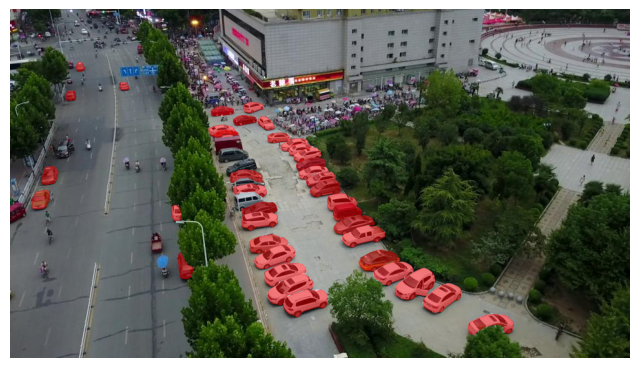

[[(742.0, 472.0), (741.0, 473.0), (736.0, 473.0), (735.0, 474.0), (734.0, 474.0), (733.0, 475.0), (731.0, 475.0), (730.0, 476.0), (729.0, 476.0), (728.0, 477.0), (726.0, 477.0), (725.0, 478.0), (724.0, 478.0), (723.0, 479.0), (722.0, 479.0), (721.0, 480.0), (720.0, 480.0), (719.0, 481.0), (718.0, 481.0), (717.0, 482.0), (715.0, 482.0), (714.0, 483.0), (713.0, 483.0), (710.0, 486.0), (710.0, 488.0), (709.0, 489.0), (709.0, 495.0), (710.0, 496.0), (710.0, 501.0), (711.0, 502.0), (712.0, 502.0), (713.0, 503.0), (719.0, 503.0), (725.0, 497.0), (726.0, 497.0), (727.0, 496.0), (728.0, 496.0), (729.0, 495.0), (730.0, 495.0), (732.0, 493.0), (733.0, 493.0), (734.0, 492.0), (735.0, 492.0), (736.0, 491.0), (739.0, 491.0), (740.0, 490.0), (742.0, 490.0), (743.0, 489.0), (749.0, 489.0), (750.0, 488.0), (759.0, 488.0), (760.0, 489.0), (761.0, 489.0), (764.0, 492.0), (764.0, 497.0), (765.0, 498.0), (765.0, 499.0), (766.0, 499.0), (768.0, 501.0), (769.0, 501.0), (770.0, 502.0), (771.0, 501.0), (773.0

In [64]:
# To plot the masks on the image for verification
car_det = []
box_annotator = sv.BoxAnnotator(color=sv.Color.red())
mask_annotator = sv.MaskAnnotator(color=sv.Color.red())

for j in car_masks:
  detections = sv.Detections(
    xyxy=sv.mask_to_xyxy(masks=j),
    mask=j
  )
  detections = detections[detections.area == np.max(detections.area)]
  car_det.append(detections)

  source_image = box_annotator.annotate(scene=image_bgr.copy(), detections=detections, skip_label=True)
  segmented_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

# TO plot all the bounding box in single input image:
image = cv2.imread('/home/jarvis/Desktop/EO_IR/visdrone/train/images/0000002_00005_d_0000014.jpg')
# print(car_det[0], "Hey***", car_det[0].xyxy[0][0])
# print(HEY)
for j in car_det:
  if j[0].xyxy[0][0]==car_det[0].xyxy[0][0]:
    annotated_image = mask_annotator.annotate(image, detections=j)
  else:
    annotated_image = mask_annotator.annotate(annotated_image.copy(), detections=j)

sv.plot_image(image=annotated_image, size=(8, 8))

# TO get polygons of respective bounding boxes in a given single image:
car_lst = []

def create_coco_annotation(binary_masks, image_ids, category_id):
    annotations = []
    binary_masks = np.array(binary_masks, np.uint8)
    for i, mask_data in enumerate(binary_masks):
        # Find contours from binary mask
        contours, _ = cv2.findContours(mask_data.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Convert contours to polygon
        polygons = []
        for contour in contours:
            contour = contour.squeeze()
            polygon = Polygon(contour)
            polygons.append(np.array(polygon.exterior.coords).ravel().tolist())
            car_lst.append(polygons)

    return car_lst


binary_masks = car_det[1].mask+0
image_ids = "abc"
category_id = 4  # Category ID for the objects in the masks


for det_id in range(len(car_det)):
  pg_pnt = create_coco_annotation(car_det[det_id].mask+0, image_ids, category_id)


new_car_lst = []
count = 0
for i in pg_pnt:
  count += 1
  tmp_lst = []
  for j in i:
    for n in range(len(j)):
      if n%2==0:
        tmp_lst.append((j[n], j[n+1]))
  new_car_lst.append(tmp_lst)
print(new_car_lst)

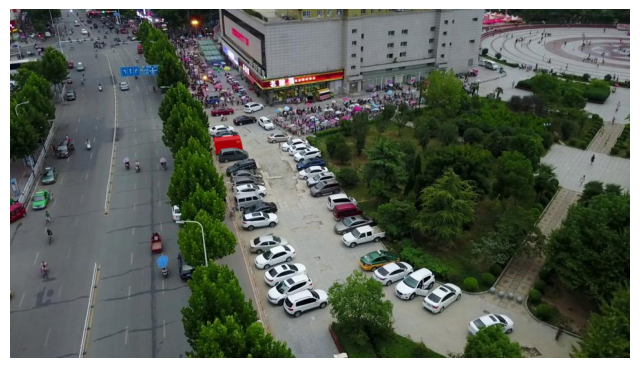

[[(342.0, 195.0), (341.0, 196.0), (335.0, 196.0), (334.0, 197.0), (327.0, 197.0), (326.0, 198.0), (317.0, 198.0), (315.0, 200.0), (315.0, 202.0), (316.0, 203.0), (316.0, 211.0), (317.0, 212.0), (317.0, 218.0), (318.0, 219.0), (318.0, 223.0), (319.0, 224.0), (321.0, 224.0), (323.0, 222.0), (323.0, 220.0), (328.0, 215.0), (333.0, 215.0), (334.0, 214.0), (342.0, 214.0), (343.0, 213.0), (346.0, 213.0), (347.0, 214.0), (352.0, 214.0), (353.0, 215.0), (354.0, 215.0), (355.0, 216.0), (359.0, 216.0), (359.0, 209.0), (358.0, 208.0), (358.0, 205.0), (357.0, 204.0), (357.0, 202.0), (356.0, 201.0), (356.0, 198.0), (354.0, 196.0), (354.0, 195.0), (348.0, 195.0), (347.0, 196.0), (344.0, 196.0), (343.0, 195.0), (342.0, 195.0)]]


In [53]:
# To plot the masks on the image for verification
tru_det = []
box_annotator = sv.BoxAnnotator(color=sv.Color.red())
mask_annotator = sv.MaskAnnotator(color=sv.Color.red())

for j in tru_masks:
  tru_detections = sv.Detections(
    xyxy=sv.mask_to_xyxy(masks=j),
    mask=j
  )
  tru_detections = tru_detections[tru_detections.area == np.max(tru_detections.area)]
  tru_det.append(tru_detections)

  source_image = box_annotator.annotate(scene=image_bgr.copy(), detections=tru_detections, skip_label=True)
  segmented_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=tru_detections)

# TO plot all the bounding box in single input image:
image = cv2.imread('/home/jarvis/Desktop/EO_IR/visdrone/train/images/0000002_00005_d_0000014.jpg')
for j in tru_det:
  if j[0].xyxy[0][0]==tru_det[0].xyxy[0][0]:
    annotated_image = mask_annotator.annotate(image, detections=j)
  else:
    annotated_image = mask_annotator.annotate(annotated_image.copy(), detections=j)
sv.plot_image(image=annotated_image, size=(8, 8))


# TO get polygons of respective bounding boxes in a given single image:
tru_lst = []

def create_coco_annotation(binary_masks, image_ids, category_id):
    annotations = []
    binary_masks = np.array(binary_masks, np.uint8)
    for i, mask_data in enumerate(binary_masks):
        # Find contours from binary mask
        contours, _ = cv2.findContours(mask_data.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Convert contours to polygon
        polygons = []
        for contour in contours:
            contour = contour.squeeze()
            polygon = Polygon(contour)
            polygons.append(np.array(polygon.exterior.coords).ravel().tolist())
            tru_lst.append(polygons)

    return tru_lst

# print(ped_det, "PED_DET")
# print(ped_det[1].mask+0, "PED_DET")
binary_masks = tru_det[0].mask+0
image_ids = "abc"
category_id = 5  # Category ID for the objects in the masks

for det_id in range(len(tru_det)):
  tru_pg_pnt = create_coco_annotation(tru_det[det_id].mask+0, image_ids, category_id)
    
# print(pg_pnt)
new_tru_lst = []
count = 0
for i in tru_pg_pnt:
  count += 1
  tmp_lst = []
  for j in i:
    for n in range(len(j)):
      if n%2==0:
        tmp_lst.append((j[n], j[n+1]))
  new_tru_lst.append(tmp_lst)
print(new_tru_lst)

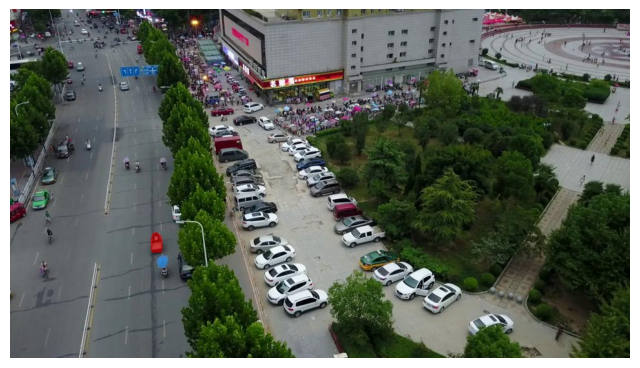

[[(225.0, 345.0), (224.0, 346.0), (222.0, 346.0), (221.0, 347.0), (220.0, 347.0), (220.0, 349.0), (219.0, 350.0), (219.0, 353.0), (218.0, 354.0), (218.0, 372.0), (219.0, 373.0), (219.0, 375.0), (220.0, 376.0), (222.0, 376.0), (223.0, 377.0), (224.0, 376.0), (232.0, 376.0), (233.0, 375.0), (234.0, 375.0), (235.0, 374.0), (235.0, 370.0), (236.0, 369.0), (236.0, 368.0), (235.0, 367.0), (235.0, 356.0), (234.0, 355.0), (234.0, 353.0), (233.0, 352.0), (233.0, 350.0), (229.0, 346.0), (228.0, 346.0), (227.0, 345.0), (225.0, 345.0)]]


In [56]:
# To plot the masks on the image for verification
tri_det = []
box_annotator = sv.BoxAnnotator(color=sv.Color.red())
mask_annotator = sv.MaskAnnotator(color=sv.Color.red())

for j in tri_masks:
  tri_detections = sv.Detections(
    xyxy=sv.mask_to_xyxy(masks=j),
    mask=j
  )
  tri_detections = tri_detections[tri_detections.area == np.max(tri_detections.area)]
  tri_det.append(tri_detections)

  source_image = box_annotator.annotate(scene=image_bgr.copy(), detections=tri_detections, skip_label=True)
  segmented_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=tri_detections)

# TO plot all the bounding box in single input image:
image = cv2.imread('/home/jarvis/Desktop/EO_IR/visdrone/train/images/0000002_00005_d_0000014.jpg')
for j in tri_det:
  if j[0].xyxy[0][0]==tri_det[0].xyxy[0][0]:
    annotated_image = mask_annotator.annotate(image, detections=j)
  else:
    annotated_image = mask_annotator.annotate(annotated_image.copy(), detections=j)
sv.plot_image(image=annotated_image, size=(8, 8))


# TO get polygons of respective bounding boxes in a given single image:
tri_lst = []

def create_coco_annotation(binary_masks, image_ids, category_id):
    annotations = []
    binary_masks = np.array(binary_masks, np.uint8)
    for i, mask_data in enumerate(binary_masks):
        # Find contours from binary mask
        contours, _ = cv2.findContours(mask_data.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Convert contours to polygon
        polygons = []
        for contour in contours:
            contour = contour.squeeze()
            polygon = Polygon(contour)
            polygons.append(np.array(polygon.exterior.coords).ravel().tolist())
            tri_lst.append(polygons)

    return tri_lst

# print(ped_det, "PED_DET")
# print(ped_det[1].mask+0, "PED_DET")
binary_masks = tri_det[0].mask+0
image_ids = "abc"
category_id = 6  # Category ID for the objects in the masks

for det_id in range(len(tri_det)):
  tri_pg_pnt = create_coco_annotation(tri_det[det_id].mask+0, image_ids, category_id)
    
# print(pg_pnt)
new_tri_lst = []
count = 0
for i in tri_pg_pnt:
  count += 1
  tmp_lst = []
  for j in i:
    for n in range(len(j)):
      if n%2==0:
        tmp_lst.append((j[n], j[n+1]))
  new_tri_lst.append(tmp_lst)
print(new_tri_lst)

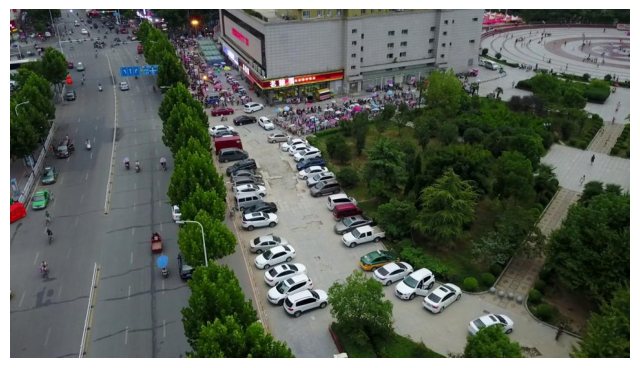

[[(8.0, 299.0), (7.0, 300.0), (6.0, 300.0), (4.0, 302.0), (3.0, 302.0), (2.0, 303.0), (1.0, 303.0), (0.0, 304.0), (0.0, 329.0), (3.0, 329.0), (4.0, 328.0), (6.0, 328.0), (8.0, 326.0), (9.0, 326.0), (10.0, 325.0), (11.0, 325.0), (12.0, 324.0), (13.0, 324.0), (14.0, 323.0), (15.0, 323.0), (16.0, 322.0), (17.0, 322.0), (18.0, 321.0), (21.0, 321.0), (24.0, 318.0), (24.0, 313.0), (23.0, 312.0), (23.0, 309.0), (22.0, 308.0), (22.0, 306.0), (21.0, 305.0), (21.0, 304.0), (20.0, 303.0), (20.0, 302.0), (19.0, 301.0), (18.0, 301.0), (17.0, 300.0), (14.0, 300.0), (13.0, 299.0), (8.0, 299.0)], [(90.0, 103.0), (88.0, 105.0), (88.0, 106.0), (87.0, 107.0), (87.0, 114.0), (88.0, 115.0), (94.0, 115.0), (95.0, 114.0), (96.0, 114.0), (96.0, 111.0), (95.0, 110.0), (95.0, 108.0), (94.0, 107.0), (94.0, 106.0), (93.0, 105.0), (93.0, 104.0), (92.0, 103.0), (90.0, 103.0)]]


In [57]:
# To plot the masks on the image for verification
awi_det = []
box_annotator = sv.BoxAnnotator(color=sv.Color.red())
mask_annotator = sv.MaskAnnotator(color=sv.Color.red())

for j in awi_masks:
  awi_detections = sv.Detections(
    xyxy=sv.mask_to_xyxy(masks=j),
    mask=j
  )
  awi_detections = awi_detections[awi_detections.area == np.max(awi_detections.area)]
  awi_det.append(awi_detections)

  source_image = box_annotator.annotate(scene=image_bgr.copy(), detections=awi_detections, skip_label=True)
  segmented_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=awi_detections)

# TO plot all the bounding box in single input image:
image = cv2.imread('/home/jarvis/Desktop/EO_IR/visdrone/train/images/0000002_00005_d_0000014.jpg')
for j in awi_det:
  if j[0].xyxy[0][0]==awi_det[0].xyxy[0][0]:
    annotated_image = mask_annotator.annotate(image, detections=j)
  else:
    annotated_image = mask_annotator.annotate(annotated_image.copy(), detections=j)
sv.plot_image(image=annotated_image, size=(8, 8))


# TO get polygons of respective bounding boxes in a given single image:
awi_lst = []

def create_coco_annotation(binary_masks, image_ids, category_id):
    annotations = []
    binary_masks = np.array(binary_masks, np.uint8)
    for i, mask_data in enumerate(binary_masks):
        # Find contours from binary mask
        contours, _ = cv2.findContours(mask_data.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Convert contours to polygon
        polygons = []
        for contour in contours:
            contour = contour.squeeze()
            polygon = Polygon(contour)
            polygons.append(np.array(polygon.exterior.coords).ravel().tolist())
            awi_lst.append(polygons)

    return awi_lst

# print(ped_det, "PED_DET")
# print(ped_det[1].mask+0, "PED_DET")
binary_masks = awi_det[0].mask+0
image_ids = "abc"
category_id = 7  # Category ID for the objects in the masks

for det_id in range(len(awi_det)):
  awi_pg_pnt = create_coco_annotation(awi_det[det_id].mask+0, image_ids, category_id)
    
# print(pg_pnt)
new_awi_lst = []
count = 0
for i in awi_pg_pnt:
  count += 1
  tmp_lst = []
  for j in i:
    for n in range(len(j)):
      if n%2==0:
        tmp_lst.append((j[n], j[n+1]))
  new_awi_lst.append(tmp_lst)
print(new_awi_lst)

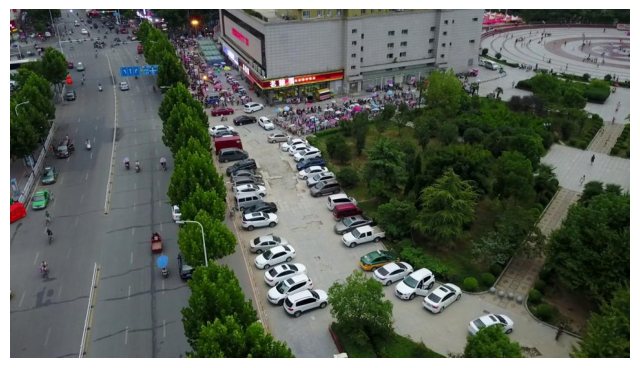

IndexError: list index out of range

In [60]:
# To plot the masks on the image for verification
bus_det = []
box_annotator = sv.BoxAnnotator(color=sv.Color.red())
mask_annotator = sv.MaskAnnotator(color=sv.Color.red())

for j in bus_masks:
  bus_detections = sv.Detections(
    xyxy=sv.mask_to_xyxy(masks=j),
    mask=j
  )
  bus_detections = bus_detections[bus_detections.area == np.max(bus_detections.area)]
  bus_det.append(bus_detections)

  source_image = box_annotator.annotate(scene=image_bgr.copy(), detections=bus_detections, skip_label=True)
  segmented_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=bus_detections)

# TO plot all the bounding box in single input image:
image = cv2.imread('/home/jarvis/Desktop/EO_IR/visdrone/train/images/0000002_00005_d_0000014.jpg')
for j in bus_det:
  if j[0].xyxy[0][0]==bus_det[0].xyxy[0][0]:
    annotated_image = mask_annotator.annotate(image, detections=j)
  else:
    annotated_image = mask_annotator.annotate(annotated_image.copy(), detections=j)
sv.plot_image(image=annotated_image, size=(8, 8))


# TO get polygons of respective bounding boxes in a given single image:
bus_lst = []

def create_coco_annotation(binary_masks, image_ids, category_id):
    annotations = []
    binary_masks = np.array(binary_masks, np.uint8)
    for i, mask_data in enumerate(binary_masks):
        # Find contours from binary mask
        contours, _ = cv2.findContours(mask_data.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Convert contours to polygon
        polygons = []
        for contour in contours:
            contour = contour.squeeze()
            polygon = Polygon(contour)
            polygons.append(np.array(polygon.exterior.coords).ravel().tolist())
            bus_lst.append(polygons)

    return bus_lst

# print(ped_det, "PED_DET")
# print(ped_det[1].mask+0, "PED_DET")
binary_masks = bus_det[0].mask+0
image_ids = "abc"
category_id = 8  # Category ID for the objects in the masks

for det_id in range(len(bus_det)):
  bus_pg_pnt = create_coco_annotation(bus_det[det_id].mask+0, image_ids, category_id)
    
# print(pg_pnt)
new_bus_lst = []
count = 0
for i in bus_pg_pnt:
  count += 1
  tmp_lst = []
  for j in i:
    for n in range(len(j)):
      if n%2==0:
        tmp_lst.append((j[n], j[n+1]))
  new_bus_lst.append(tmp_lst)
print(new_bus_lst)

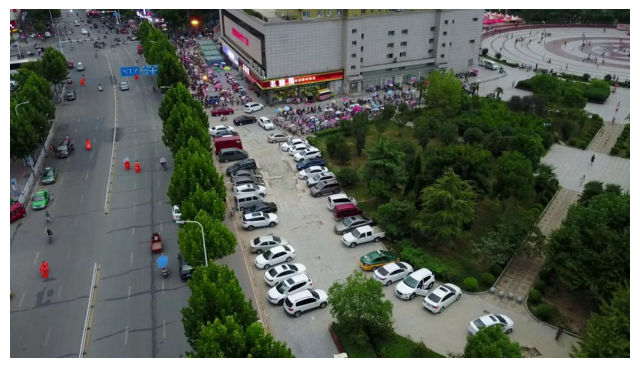

[[(50.0, 391.0), (50.0, 392.0), (49.0, 393.0), (49.0, 394.0), (48.0, 395.0), (48.0, 396.0), (47.0, 397.0), (47.0, 399.0), (46.0, 400.0), (46.0, 403.0), (47.0, 404.0), (47.0, 406.0), (48.0, 407.0), (48.0, 409.0), (49.0, 410.0), (49.0, 412.0), (50.0, 413.0), (50.0, 414.0), (51.0, 415.0), (52.0, 415.0), (53.0, 416.0), (55.0, 416.0), (56.0, 415.0), (57.0, 415.0), (58.0, 414.0), (58.0, 410.0), (59.0, 409.0), (59.0, 398.0), (58.0, 397.0), (58.0, 395.0), (57.0, 394.0), (57.0, 393.0), (55.0, 391.0), (50.0, 391.0)], [(196.0, 237.0), (194.0, 239.0), (194.0, 240.0), (193.0, 241.0), (193.0, 248.0), (194.0, 249.0), (194.0, 251.0), (195.0, 252.0), (200.0, 252.0), (201.0, 251.0), (201.0, 250.0), (202.0, 249.0), (202.0, 248.0), (201.0, 247.0), (201.0, 243.0), (200.0, 242.0), (200.0, 239.0), (199.0, 238.0), (198.0, 238.0), (197.0, 237.0), (196.0, 237.0)], [(181.0, 235.0), (180.0, 236.0), (178.0, 236.0), (177.0, 237.0), (177.0, 242.0), (178.0, 243.0), (178.0, 245.0), (179.0, 246.0), (179.0, 247.0), (180

In [62]:
# To plot the masks on the image for verification
mot_det = []
box_annotator = sv.BoxAnnotator(color=sv.Color.red())
mask_annotator = sv.MaskAnnotator(color=sv.Color.red())

for j in mot_masks:
  mot_detections = sv.Detections(
    xyxy=sv.mask_to_xyxy(masks=j),
    mask=j
  )
  mot_detections = mot_detections[mot_detections.area == np.max(mot_detections.area)]
  mot_det.append(mot_detections)

  source_image = box_annotator.annotate(scene=image_bgr.copy(), detections=mot_detections, skip_label=True)
  segmented_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=mot_detections)

# TO plot all the bounding box in single input image:
image = cv2.imread('/home/jarvis/Desktop/EO_IR/visdrone/train/images/0000002_00005_d_0000014.jpg')
for j in mot_det:
  if j[0].xyxy[0][0]==mot_det[0].xyxy[0][0]:
    annotated_image = mask_annotator.annotate(image, detections=j)
  else:
    annotated_image = mask_annotator.annotate(annotated_image.copy(), detections=j)
sv.plot_image(image=annotated_image, size=(8, 8))


# TO get polygons of respective bounding boxes in a given single image:
mot_lst = []

def create_coco_annotation(binary_masks, image_ids, category_id):
    annotations = []
    binary_masks = np.array(binary_masks, np.uint8)
    for i, mask_data in enumerate(binary_masks):
        # Find contours from binary mask
        contours, _ = cv2.findContours(mask_data.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Convert contours to polygon
        polygons = []
        for contour in contours:
            contour = contour.squeeze()
            polygon = Polygon(contour)
            polygons.append(np.array(polygon.exterior.coords).ravel().tolist())
            mot_lst.append(polygons)

    return mot_lst

# print(ped_det, "PED_DET")
# print(ped_det[1].mask+0, "PED_DET")
binary_masks = mot_det[0].mask+0
image_ids = "abc"
category_id = 8  # Category ID for the objects in the masks

for det_id in range(len(mot_det)):
  mot_pg_pnt = create_coco_annotation(mot_det[det_id].mask+0, image_ids, category_id)
    
# print(pg_pnt)
new_mot_lst = []
count = 0
for i in mot_pg_pnt:
  count += 1
  tmp_lst = []
  for j in i:
    for n in range(len(j)):
      if n%2==0:
        tmp_lst.append((j[n], j[n+1]))
  new_mot_lst.append(tmp_lst)
print(new_mot_lst)

(765, 1360)


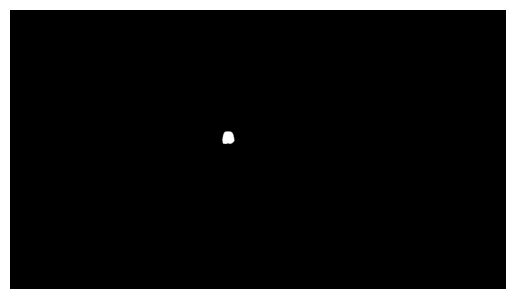

In [ ]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np
#input data

img = np.squeeze(img)
print(img.shape)
plt.axis('off')
plt.grid(False)
plt.imshow(img, cmap="gray")
plt.savefig("/content/mk.jpg")

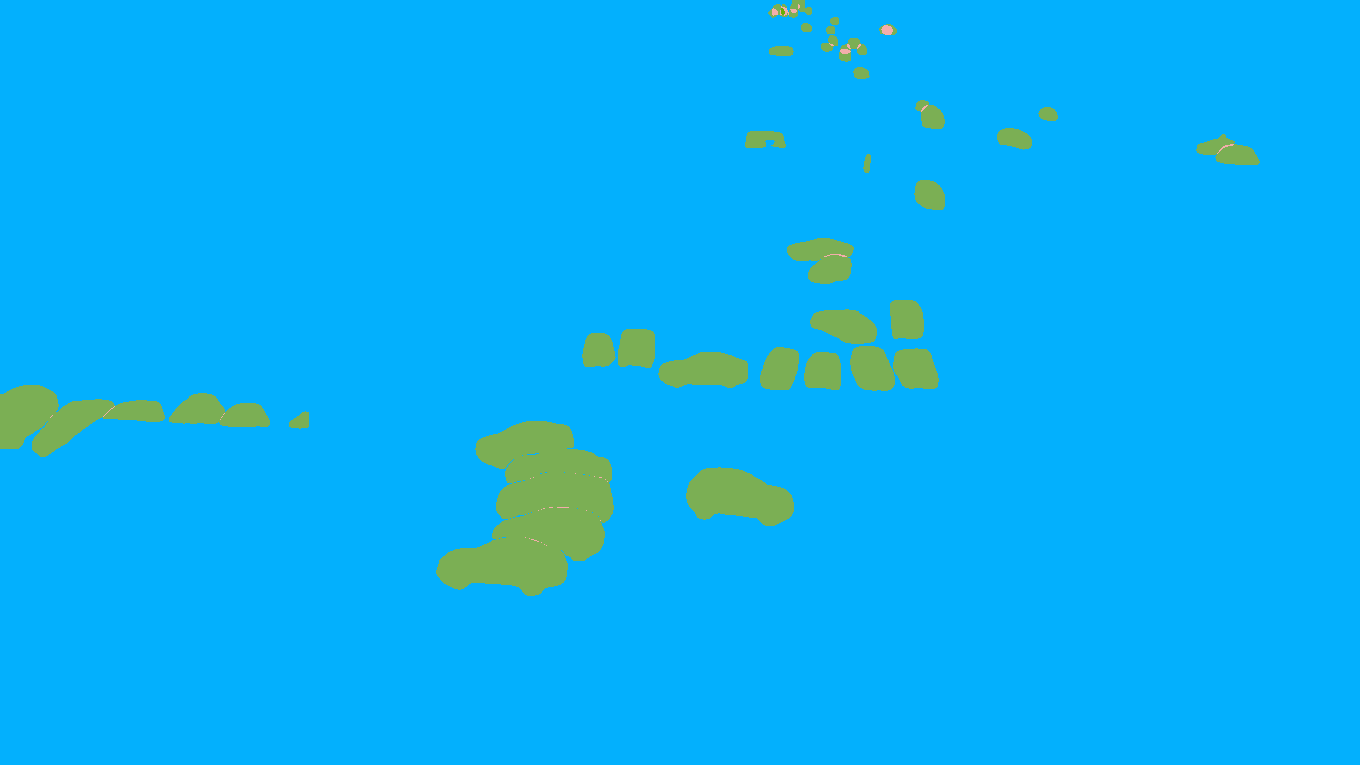

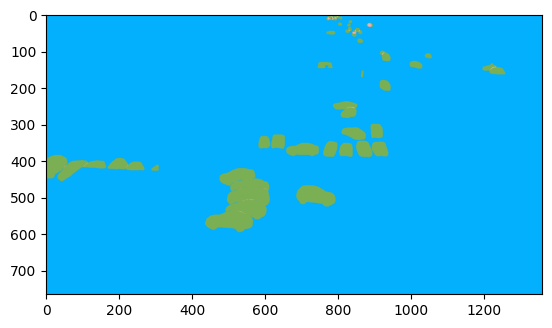

In [ ]:
from numpy.ma.core import shape
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Coloring objects based on labels with random initialization

tmp_image = np.array((765,1360,3))


for j in range(len(car_det)):
  array = car_det[j].mask+0
  mat = np.reshape(array,(765,1360))

  # Creates PIL image
  img = Image.fromarray(np.uint8(mat * 255) , 'L')
  car1 = np.array(img)
  car = np.array([car1])
  mat = np.expand_dims(mat, axis=-1)
  # print(mat.shape, "----")
  a = mat[:,:,:]
  b = mat[:,:,:]
  c = mat[:,:,:]

  final = np.stack((a,b,c), axis=2)
  final = np.squeeze(final)
  # print(final.shape)
  im = Image.fromarray(np.uint8(final * 255), 'RGB')
  im = np.asarray(im)
  im[:,:,0] = im[:,:,0]*120
  im[:,:,1] = im[:,:,1]*255
  im[:,:,2] = im[:,:,2]*87
  tmp_image = np.add(tmp_image, im)
  # im = Image.fromarray(im)
  # im.show()
tmp_image = Image.fromarray(np.uint8(tmp_image * 255), 'RGB')
tmp_image.show()

plt.imshow(tmp_image, cmap="gray")
plt.show()

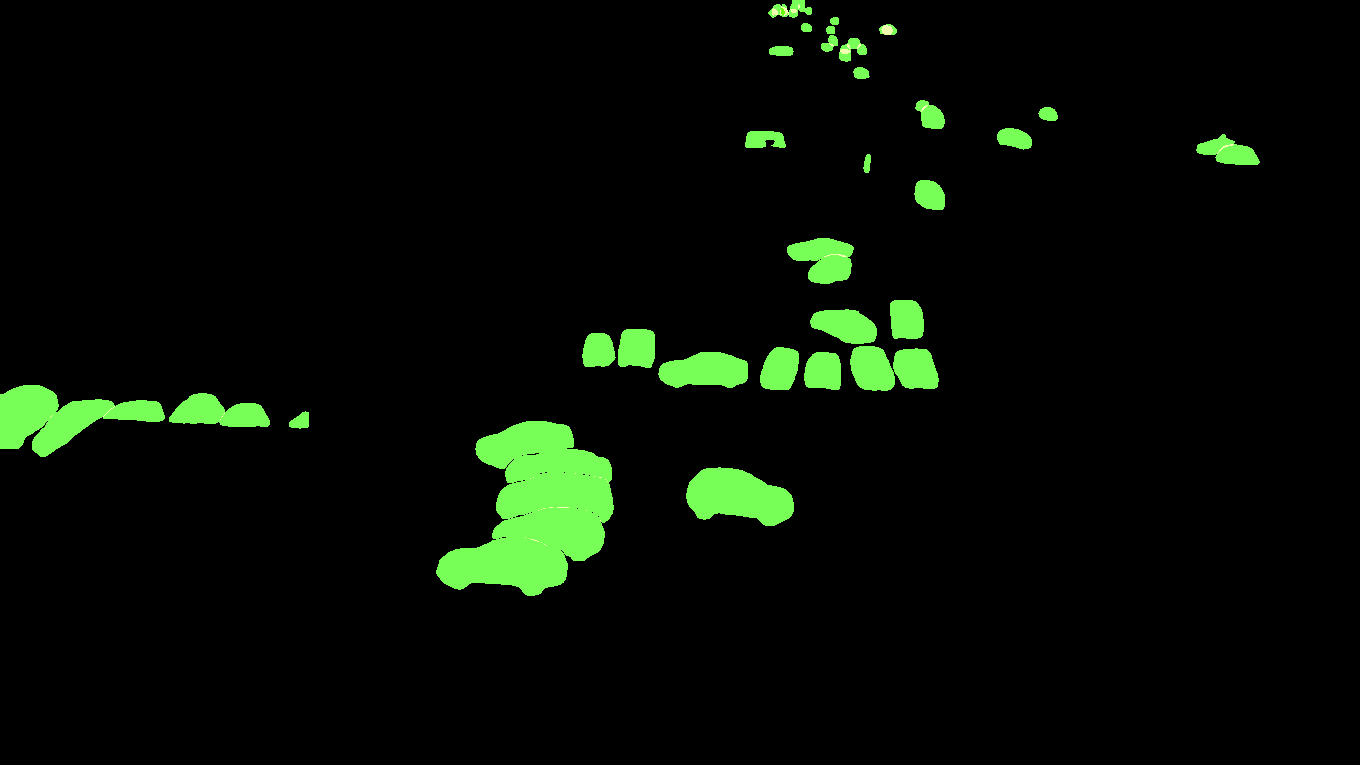

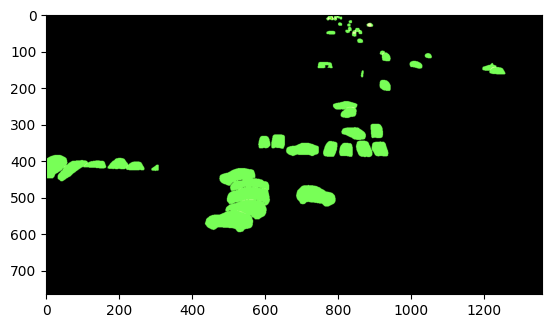

In [ ]:
from numpy.ma.core import shape
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Coloring objects based on labels with initialization made to zero

tmp_image = np.zeros((765,1360,3))


for j in range(len(car_det)):
  array = car_det[j].mask+0
  mat = np.reshape(array,(765,1360))

  # Creates PIL image
  img = Image.fromarray(np.uint8(mat * 255) , 'L')
  car1 = np.array(img)
  car = np.array([car1])
  mat = np.expand_dims(mat, axis=-1)
  # print(mat.shape, "----")
  a = mat[:,:,:]
  b = mat[:,:,:]
  c = mat[:,:,:]

  final = np.stack((a,b,c), axis=2)
  final = np.squeeze(final)
  # print(final.shape)
  im = Image.fromarray(np.uint8(final * 255), 'RGB')
  im = np.asarray(im)
  im[:,:,0] = im[:,:,0]*120
  im[:,:,1] = im[:,:,1]*255
  im[:,:,2] = im[:,:,2]*87
  tmp_image = np.add(tmp_image, im)
  # im = Image.fromarray(im)
  # im.show()
tmp_image = Image.fromarray(np.uint8(tmp_image * 255), 'RGB')
cv2.imwrite("/content/car_masks.jpg", np.asarray(tmp_image))
tmp_image.show()

plt.imshow(tmp_image, cmap="gray")
plt.show()

(765, 1360, 1) ----
(765, 1360, 3)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


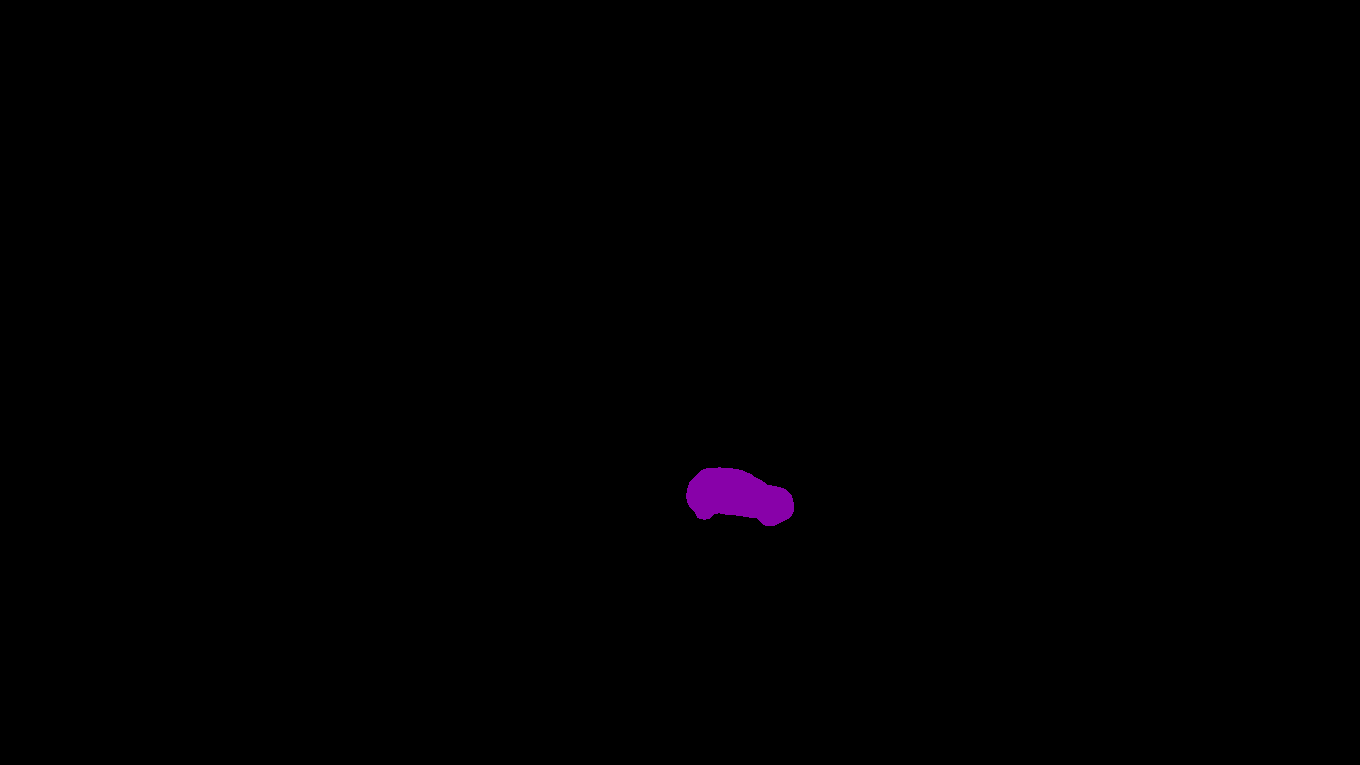

In [ ]:
import numpy as np
from PIL import Image

# gradient between 0 and 1 for 256*256
array = car_det[0].mask+0

# reshape to 2d
mat = np.reshape(array,(765,1360))

# Creates PIL image
img = Image.fromarray(np.uint8(mat * 255) , 'L')
car1 = np.array(img)
car = np.array([car1])
mat = np.expand_dims(mat, axis=-1)
print(mat.shape, "----")
a = mat[:,:,:]
b = mat[:,:,:]
c = mat[:,:,:]

final = np.stack((a,b,c), axis=2)
# print(final)

cv2.imwrite("/content/filesfggijg.jpg", np.array(final))
final = np.squeeze(final)
print(final.shape)
im = Image.fromarray(np.uint8(final * 255), 'RGB')
im = np.asarray(im)
im[:,:,0] = im[:,:,0]*120
im[:,:,1] = im[:,:,1]*255
im[:,:,2] = im[:,:,2]*87
print(im[:,:,2])

cv2.imwrite("/content/finalfile.jpg", np.asarray(im))
im = Image.fromarray(im)
im.show()

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


binary_mask = car_det[1].mask+0
# Convert binary mask shape to (740, 1280, 1)
converted_mask = np.squeeze(binary_mask, axis=0)
converted_mask = np.expand_dims(converted_mask, axis=2)

print(converted_mask.shape)

cv2_imshow(converted_mask)
cv2.imwrite("bk1.jpg",)

In [ ]:
import torchvision
from PIL import Image

bk_image = np.zeros(shape=(1,765,1360))
img = Image.open("/content/0000006_00159_d_0000001.jpg")

im_np = np.array(img)
mk1 = car_det[1].mask
mk1_3 = mk1[:,:,1]
mk1_3 = mk1[:,:,2]
mk1_3 = mk1[:,:,3]

print(mk1.shape)
print(im_np.shape)


trafos = torchvision.transforms.Compose([
    torchvision.transforms.Grayscale(num_output_channels=1),
    torchvision.transforms.ToTensor(),
])


cv2.imwrite("/content/mk1.jpg", np.array(trafos(img)))

# sv.plot_images_grid(
#     images=mk1_3,
#     grid_size=(1,2),
#     size=(16, 4)
# )


# for n in range(len(car_det)):
#   bk_image += car_det[n].mask

# sv.plot_images_grid(
#     images=bk_image,
#     grid_size=(1,2),
#     size=(16, 4)
# )

(1, 765, 1360)
(765, 1360, 3)


False

In [ ]:
import os
import numpy as np
import json
import cv2
from shapely.geometry import Polygon


final_lst = []

def create_coco_annotation(binary_masks, image_ids, category_id):
    annotations = []
    binary_masks = np.array(binary_masks, np.uint8)
    for i, mask_data in enumerate(binary_masks):
        # Find contours from binary mask
        contours, _ = cv2.findContours(mask_data.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Convert contours to polygon
        polygons = []
        for contour in contours:
            contour = contour.squeeze()
            polygon = Polygon(contour)
            polygons.append(np.array(polygon.exterior.coords).ravel().tolist())
            final_lst.append(polygons)
            # print(len(polygons))
            # print(polygons)

        # print(polygons, "Polygons")

        # annotation = {
        #     'id': i + 1,
        #     'image_id': image_ids[i],
        #     'category_id': category_id,
        #     'segmentation': polygons,
        #     'area': float(mask_data.sum()),
        #     'bbox': cv2.boundingRect(mask_data.astype(np.uint8)).tolist(),
        #     'iscrowd': 0
        # }
        # annotations.append(annotation)

    return final_lst


# Example usage
binary_masks = total_det[1].mask+0

image_ids = "abc"

category_id = 1  # Category ID for the objects in the masks


for det_id in range(len(total_det)):
  pg_pnt = create_coco_annotation(total_det[det_id].mask+0, image_ids, category_id)

# print(pg_pnt)

new_lst = []
count = 0
for i in pg_pnt:
  count += 1
  tmp_lst = []
  for j in i:
    for n in range(len(j)):
      if n%2==0:
        tmp_lst.append((j[n], j[n+1]))
        # print((count, j[n], j[n+1]))
  new_lst.append(tmp_lst)



print(new_lst)

# annotations = create_coco_annotation(binary_masks, image_ids, category_id)

# Create COCO JSON annotation
# coco_annotation = {
#     'annotations': annotations,
#     'categories': [
#         {
#             'id': category_id,
#             'name': 'object_category',
#             'supercategory': 'object'
#         }
#     ]
# }

# Save the COCO JSON annotation to a file
# with open('/content/annotations.txt', 'w') as f:
#     json.dump(pg_pnt, f)


[[(718.0, 467.0), (717.0, 468.0), (706.0, 468.0), (705.0, 469.0), (703.0, 469.0), (702.0, 470.0), (701.0, 470.0), (689.0, 482.0), (689.0, 484.0), (688.0, 485.0), (688.0, 487.0), (687.0, 488.0), (687.0, 492.0), (686.0, 493.0), (686.0, 498.0), (687.0, 499.0), (687.0, 502.0), (688.0, 503.0), (688.0, 504.0), (689.0, 505.0), (689.0, 506.0), (695.0, 512.0), (695.0, 513.0), (696.0, 514.0), (696.0, 515.0), (697.0, 516.0), (697.0, 517.0), (698.0, 517.0), (699.0, 518.0), (702.0, 518.0), (703.0, 519.0), (705.0, 519.0), (706.0, 518.0), (709.0, 518.0), (714.0, 513.0), (717.0, 513.0), (718.0, 512.0), (719.0, 512.0), (720.0, 513.0), (724.0, 513.0), (725.0, 514.0), (735.0, 514.0), (736.0, 515.0), (742.0, 515.0), (743.0, 516.0), (748.0, 516.0), (749.0, 517.0), (756.0, 517.0), (763.0, 524.0), (764.0, 524.0), (765.0, 525.0), (774.0, 525.0), (775.0, 524.0), (776.0, 524.0), (777.0, 523.0), (778.0, 523.0), (779.0, 522.0), (780.0, 522.0), (781.0, 521.0), (782.0, 521.0), (783.0, 520.0), (784.0, 520.0), (785.0

In [ ]:
cv2.imwrite("/content/abc_all_instance.jpg", annotated_image)

True

In [ ]:
bk_image = np.zeros(shape=(1,765,1360))

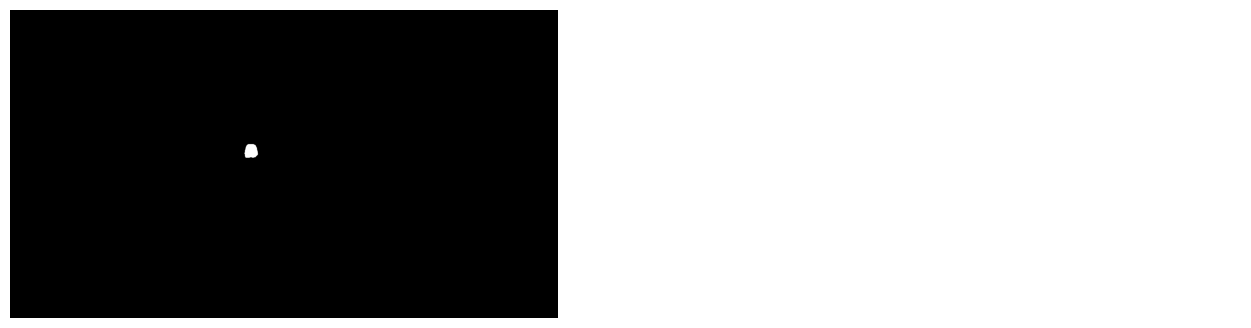

(1, 765, 1360)
(1, 765, 1360)


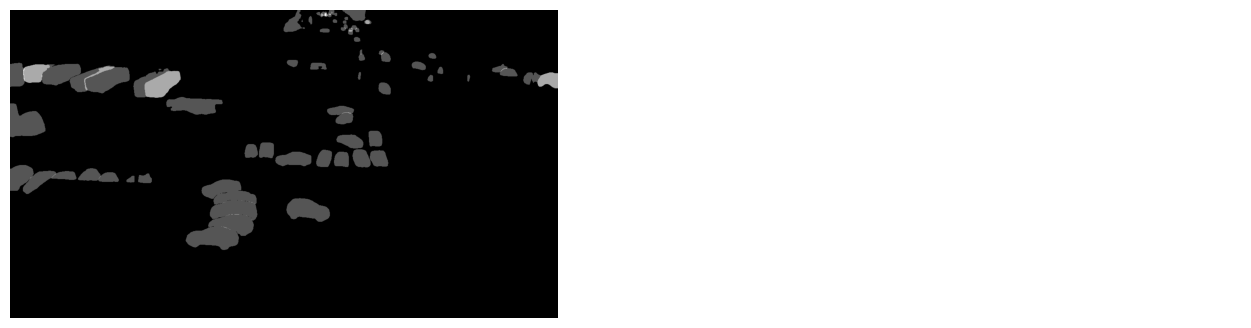

In [ ]:
sv.plot_images_grid(
    images=total_det[1].mask,
    grid_size=(1,2),
    size=(16, 4)
)

print(total_det[0].mask.shape)

for n in range(len(total_det)):
  bk_image += total_det[n].mask

print(bk_image.shape)

sv.plot_images_grid(
    images=bk_image,
    grid_size=(1,2),
    size=(16, 4)
)

## Automated Mask Generation

To run automatic mask generation, provide a SAM model to the `SamAutomaticMaskGenerator` class. Set the path below to the SAM checkpoint. Running on CUDA and with the default model is recommended.

In [ ]:
mask_generator = SamAutomaticMaskGenerator(sam)

In [ ]:
import numpy as np
from dataclasses import dataclass
from typing import List, Tuple, Union, Optional
from dataclasses_json import dataclass_json
from supervision import Detections


@dataclass_json
@dataclass
class COCOCategory:
    id: int
    name: str
    supercategory: str


@dataclass_json
@dataclass
class COCOImage:
    id: int
    width: int
    height: int
    file_name: str
    license: int
    date_captured: str
    coco_url: Optional[str] = None
    flickr_url: Optional[str] = None


@dataclass_json
@dataclass
class COCOAnnotation:
    id: int
    image_id: int
    category_id: int
    segmentation: List[List[float]]
    area: float
    bbox: Tuple[float, float, float, float]
    iscrowd: int


@dataclass_json
@dataclass
class COCOLicense:
    id: int
    name: str
    url: str


@dataclass_json
@dataclass
class COCOJson:
    images: List[COCOImage]
    annotations: List[COCOAnnotation]
    categories: List[COCOCategory]
    licenses: List[COCOLicense]


def load_coco_json(json_file: str) -> COCOJson:
    import json

    with open(json_file, "r") as f:
        json_data = json.load(f)

    return COCOJson.from_dict(json_data)


class COCOJsonUtility:
    @staticmethod
    def get_annotations_by_image_id(coco_data: COCOJson, image_id: int) -> List[COCOAnnotation]:
        return [annotation for annotation in coco_data.annotations if annotation.image_id == image_id]

    @staticmethod
    def get_annotations_by_image_path(coco_data: COCOJson, image_path: str) -> Optional[List[COCOAnnotation]]:
        image = COCOJsonUtility.get_image_by_path(coco_data, image_path)
        if image:
            return COCOJsonUtility.get_annotations_by_image_id(coco_data, image.id)
        else:
            return None

    @staticmethod
    def get_image_by_path(coco_data: COCOJson, image_path: str) -> Optional[COCOImage]:
        for image in coco_data.images:
            if image.file_name == image_path:
                return image
        return None

    @staticmethod
    def annotations2detections(annotations: List[COCOAnnotation]) -> Detections:
        class_id, xyxy = [], []

        for annotation in annotations:
            x_min, y_min, width, height = annotation.bbox
            class_id.append(annotation.category_id)
            xyxy.append([
                x_min,
                y_min,
                x_min + width,
                y_min + height
            ])

        return Detections(
            xyxy=np.array(xyxy, dtype=int),
            class_id=np.array(class_id, dtype=int)
        )

### Download Dataset from Roboflow

In [ ]:
%cd {HOME}

import roboflow
from roboflow import Roboflow

roboflow.login()

rf = Roboflow()

project = rf.workspace("hashira-fhxpj").project("mri-brain-tumor")
dataset = project.version(1).download("coco")

/content
visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to MRI-BRAIN-TUMOR-1 in coco:: 100%|██████████| 85/85 [00:00<00:00, 2992.34it/s]


In [ ]:
import os

DATA_SET_SUBDIRECTORY = "test"
ANNOTATIONS_FILE_NAME = "_annotations.coco.json"
IMAGES_DIRECTORY_PATH = os.path.join(dataset.location, DATA_SET_SUBDIRECTORY)
ANNOTATIONS_FILE_PATH = os.path.join(dataset.location, DATA_SET_SUBDIRECTORY, ANNOTATIONS_FILE_NAME)

In [ ]:
coco_data = load_coco_json(json_file=ANNOTATIONS_FILE_PATH)

CLASSES = [
    category.name
    for category
    in coco_data.categories
    if category.supercategory != 'none'
]

IMAGES = [
    image.file_name
    for image
    in coco_data.images
]

In [ ]:
CLASSES

['YES-TUMOR']

### Single Image Bounding Box to Mask

In [ ]:
# set random seed to allow easy reproduction of the experiment

import random
random.seed(10)

In [ ]:
mask_predictor = SamPredictor(sam)

In [ ]:
import cv2
import supervision as sv
from matplotlib import pyplot as plt
from PIL import Image
import PIL



# EXAMPLE_IMAGE_NAME = random.choice(IMAGES)
EXAMPLE_IMAGE_NAME = "Y16_JPG.rf.96e3fc38718c5f64776810040e63363c.jpg"
EXAMPLE_IMAGE_PATH = os.path.join(dataset.location, DATA_SET_SUBDIRECTORY, EXAMPLE_IMAGE_NAME)


print("File name: ", EXAMPLE_IMAGE_NAME)
# load dataset annotations
annotations = COCOJsonUtility.get_annotations_by_image_path(coco_data=coco_data, image_path=EXAMPLE_IMAGE_NAME)
ground_truth = COCOJsonUtility.annotations2detections(annotations=annotations)

# small hack - coco numerate classes from 1, model from 0 + we drop first redundant class from coco json
ground_truth.class_id = ground_truth.class_id - 1

# load image
image_bgr = cv2.imread(EXAMPLE_IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# initiate annotator
box_annotator = sv.BoxAnnotator(color=sv.Color.red())
mask_annotator = sv.MaskAnnotator(color=sv.Color.red())

# annotate ground truth
annotated_frame_ground_truth = box_annotator.annotate(scene=image_bgr.copy(), detections=ground_truth, skip_label=True)

output = []
img_shp = image_rgb.shape
img = np.zeros(img_shp)
# run SAM inference
mask_predictor.set_image(image_rgb)

for i in ground_truth.xyxy:
  masks, scores, logits = mask_predictor.predict(
      box=i,
      multimask_output=True
  )

  detections = sv.Detections(
      xyxy=sv.mask_to_xyxy(masks=masks),
      mask=masks
  )
  # detections = detections[detections.area == np.max(detections.area)]
  detections = detections[detections.area == np.max(detections.area)]
  # output += detections.mask
  print( "masks__________________-------------",detections.mask,)
  print(type(detections))

  # annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

  ################------Old code-----------################
  # annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

  # sv.plot_images_grid(
  #       images=[annotated_frame_ground_truth, annotated_image],
  #       grid_size=(1, 2),
  #       titles=['source image', 'segmented image']
  # )
  ##############----------end----------------###############

  output.append(detections)
  print(len(output))
  print(output[0].mask)

  for j in output:
    annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=j[0:2])
    print(annotated_image.shape, "--------------------")
    img += annotated_image
    img = img.reshape(416,416,1)

    plt.imshow(img)


    sv.plot_images_grid(
          images=[annotated_frame_ground_truth, annotated_image],
          grid_size=(1, 2),
          titles=['source image', 'segmented image']
    )
    print(j[0].mask.shape)
    imgplot = plt.imshow(j[0].mask)